In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_154796/2462604797.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


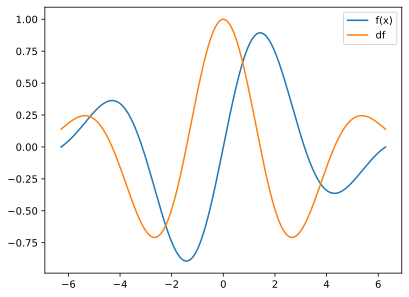

In [4]:
# The function

x = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x) * np.exp(-x**2*.05)

df = np.cos(x) * np.exp(-x**2*.05) + np.sin(x) * np.exp(-x**2*.05) * (-.1*x)

plt.plot(x, fx, x, df)
plt.legend(['f(x)', 'df'])

In [5]:
def fx(x):
    return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
    return np.cos(x) * np.exp(-x**2*.05) + np.sin(x) * np.exp(-x**2*.05) * (-.1*x)

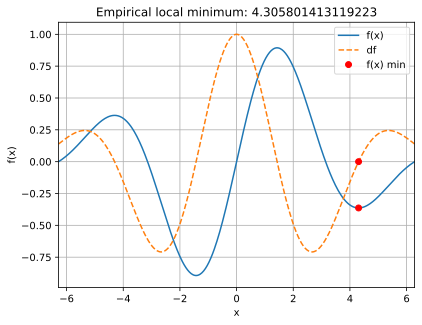

In [6]:
## Gradient Descent

# starting local min
localmin = np.random.choice(x, 1)

# learning rate and training epochs
learning_rate = 0.01
training_epochs = 100

for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - grad

# plot the results
plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

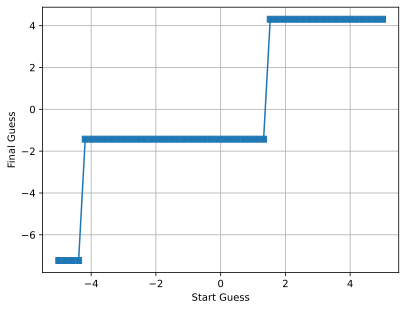

In [14]:
# Exp1: systematically varying the starting points

startlocs = np.linspace(-5, 5, 50)
finalres = np.zeros(len(startlocs))
learning_rate = 0.01
training_epochs = 100
for idx, localmin in enumerate(startlocs):
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - grad
    finalres[idx] = localmin

plt.plot(startlocs, finalres, 's-')
plt.xlabel('Start Guess')
plt.grid()
plt.ylabel('Final Guess')
plt.show()

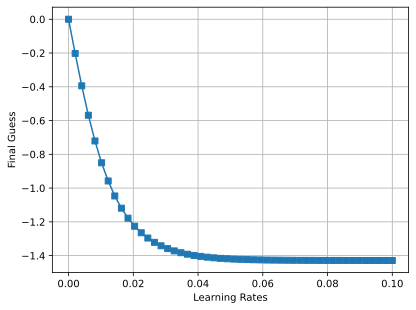

In [12]:
# systematically varying the learning rates
learning_rates = np.linspace(1e-10, 1e-1, 50)
finalres = np.zeros(len(learning_rates))

for idx, learning_rate in enumerate(learning_rates):
    localmin = 0
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learning_rate* grad
    finalres[idx] = localmin

plt.plot(learning_rates, finalres, 's-')
plt.xlabel('Learning Rates')
plt.ylabel('Final Guess')   
plt.grid()
plt.show()

In [19]:
# Expt 3: Interaction between learning rate and training epoch

learning_rates = np.linspace(1e-10, 1e-1, 50)
training_epochs = np.linspace(10, 500, 40)

# init final res to store res
finalres = np.zeros((len(learning_rates), len(training_epochs)))

for Lidx, learning_rate in enumerate(learning_rates):
    for Eidx, epochs in enumerate(training_epochs):
        localmin = 0
        for i in range(int(epochs)):
            grad = deriv(localmin)
            localmin = localmin - learning_rate* grad
        finalres[Lidx, Eidx] = localmin

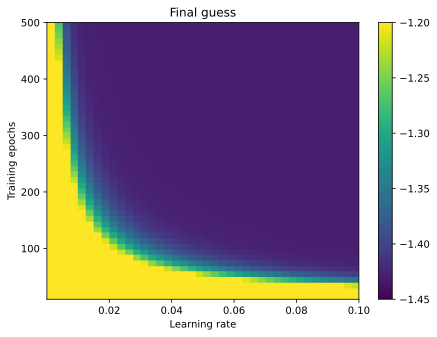

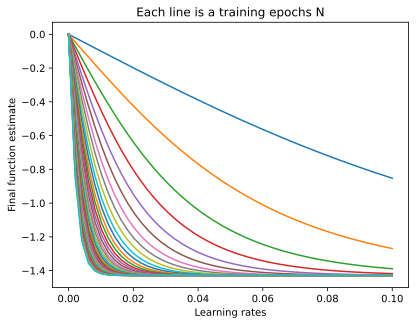

In [20]:
# plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learning_rates[0],learning_rates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learning_rates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()